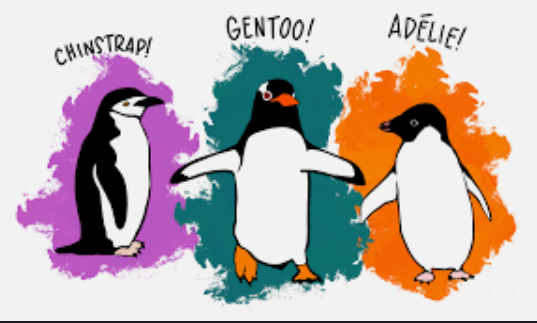

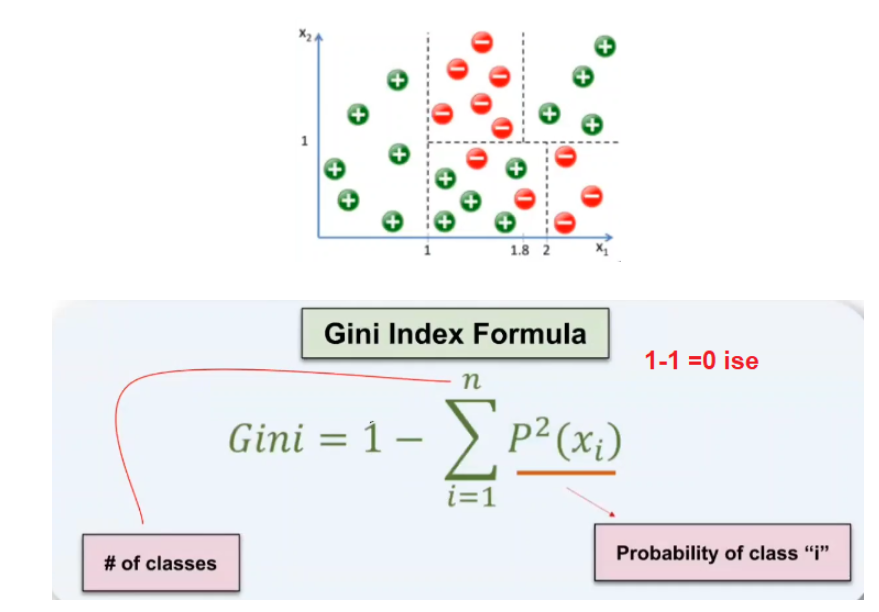

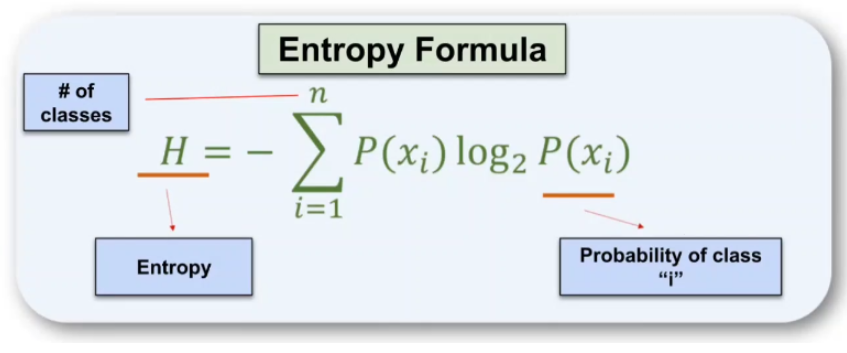

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import plotly.express as px
import pygwalker as pyg #pip install pygwalker


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from yellowbrick.classifier import ClassPredictionError
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [3]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
df[df["sex"]=="."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [12]:
df[df.species=="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [13]:
df.loc[336, "sex"] = "MALE"

In [14]:
df.loc[336, "sex"]

'MALE'

# Visualizations

In [15]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

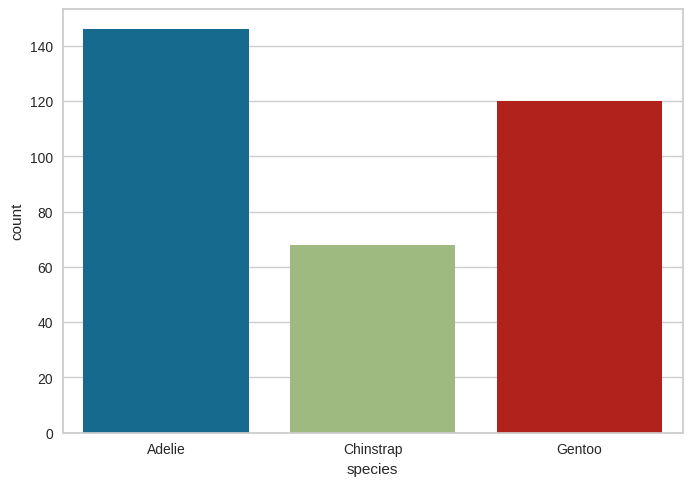

In [16]:
 sns.countplot(x = "species", data = df);

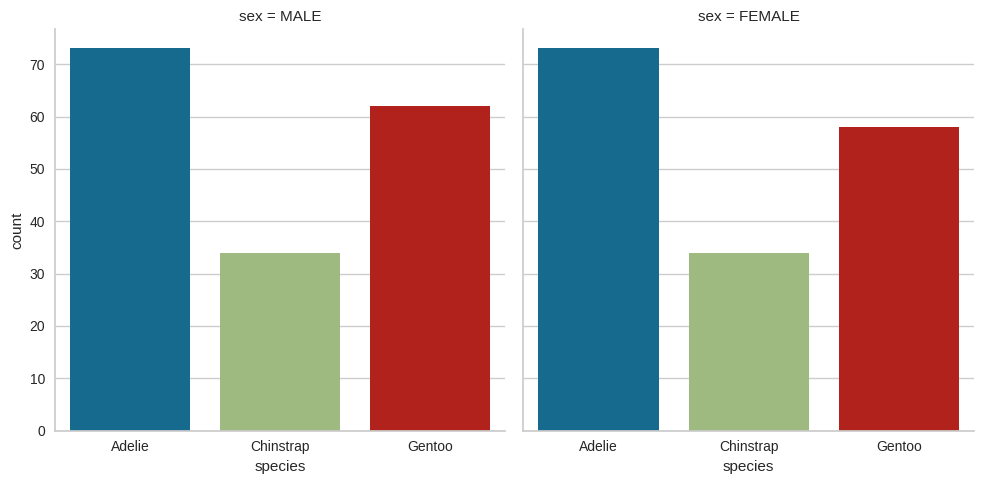

In [17]:
sns.catplot(x = "species", data = df, kind = "count", col = "sex");

<Figure size 1200x600 with 0 Axes>

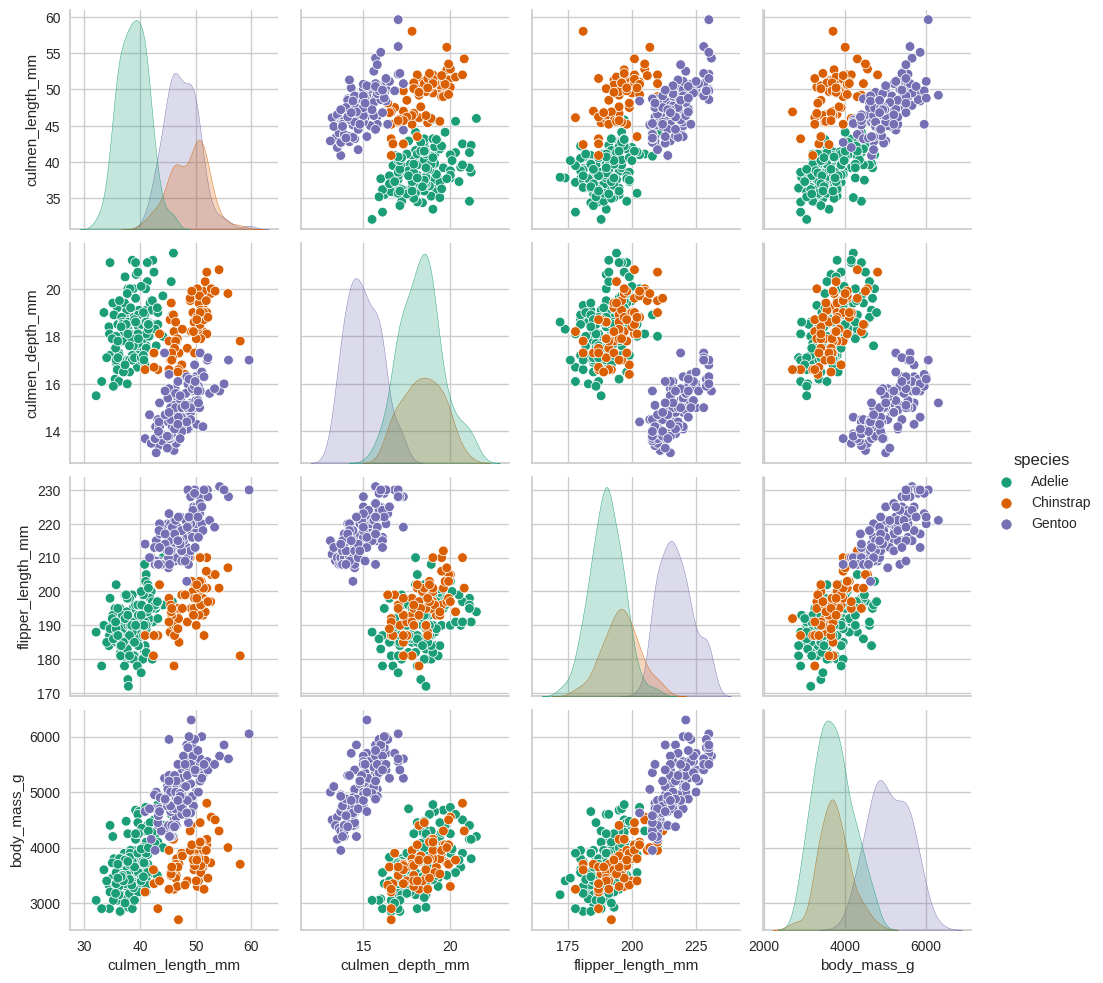

In [18]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue= "species", palette="Dark2")
plt.show();

In [19]:
fig = px.scatter_3d(df,
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [20]:
pyg.walk(df)

In [21]:
df.select_dtypes("number")# numeric veriler

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

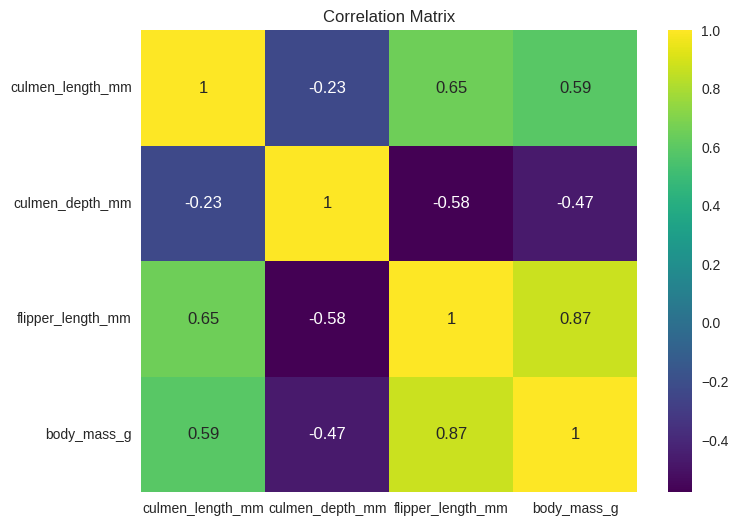

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [23]:
## here can be multicolinearity

In [24]:
df.drop("species", axis=1)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
4    Torgersen              36.7             19.3              193.0   
5    Torgersen              39.3             20.6              190.0   
..         ...               ...              ...                ...   
338     Biscoe              47.2             13.7              214.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 6 columns]

In [25]:
pd.get_dummies(df.drop("species", axis = 1), drop_first=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

## Train | Test Split

In [26]:
X = pd.get_dummies(df.drop("species", axis = 1), drop_first=True)
y = df["species"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
### Tree based modelllerde scale işlemi yapılmıyor.

In [29]:
DT_model = DecisionTreeClassifier(random_state=101)

In [30]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [31]:
y_pred = DT_model.predict(X_train)

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

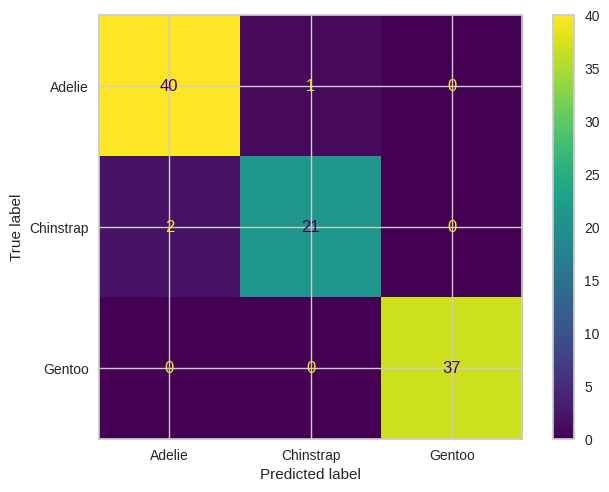

In [33]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test);

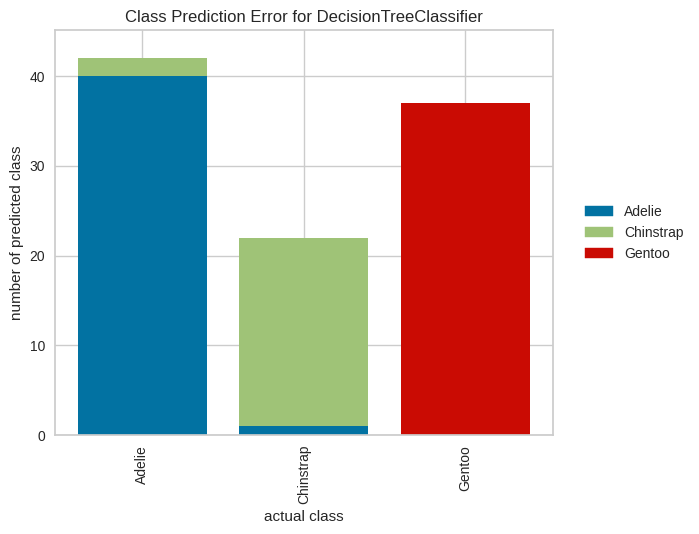

In [34]:
visualizer = ClassPredictionError(DT_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();
# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor

In [35]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Cross Validate

In [36]:
model = DecisionTreeClassifier(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.004498    0.013587       0.958333              0.958333   
2   0.007564    0.017896       0.958333              0.958333   
3   0.007445    0.015491       0.916667              0.916667   
4   0.004017    0.009647       0.956522              0.956522   
5   0.003824    0.008977       1.000000              1.000000   
6   0.003948    0.008722       1.000000              1.000000   
7   0.003731    0.008651       1.000000              1.000000   
8   0.004531    0.009112       1.000000              1.000000   
9   0.003964    0.009128       0.869565              0.869565   
10  0.004051    0.011467       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [37]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

In [38]:
## Import-> ıf the target varıable has at least 3 class we look to the accuracy(micro), macro, waighted_avg scores.
## If ıt is classification model with 2 class then we look for the accuracy, precision, recall, f1 scores

In [39]:
DT_model.feature_importances_

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [40]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_,
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i   ## gini scores effect shows. Multicolineariti -> also we decide here
 ### flipper and culmen deside %86 of predictions if we add island %99 predict.
    ## Lasso gibi davranıyor and do not add the insightes from other features

Feature Importance
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000
culmen_depth_mm              0.052893
island_Dream                 0.078360
culmen_length_mm             0.325918
flipper_length_mm            0.542829

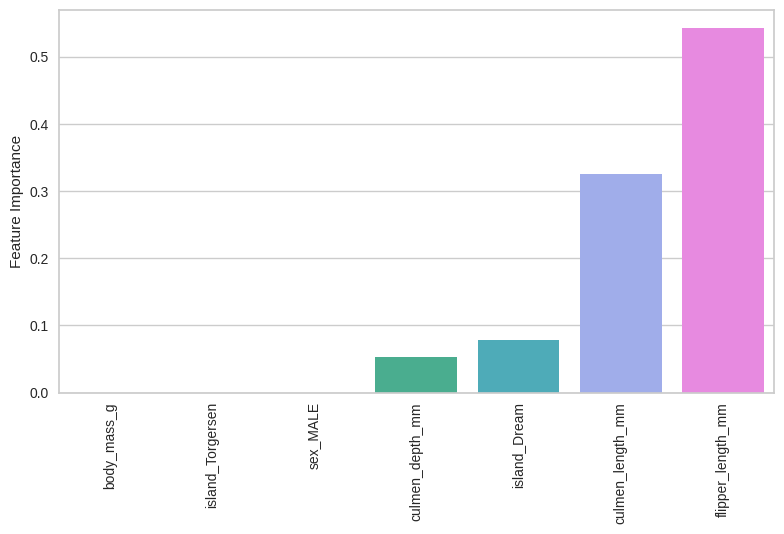

In [41]:
sns.barplot(x = df_f_i.index, y = "Feature Importance", data = df_f_i)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
X2 = X.drop(columns = ["flipper_length_mm"])

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [44]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [45]:
DT2_model.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=101)

In [46]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [47]:
df_f_i2 = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_,
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i2

Feature Importance
body_mass_g                 0.000000
island_Torgersen            0.000000
sex_MALE                    0.010853
culmen_depth_mm             0.113994
island_Dream                0.370391
culmen_length_mm            0.504762

In [48]:
model = DecisionTreeClassifier(random_state=101)

In [49]:
scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.007566    0.013485       1.000000              1.000000   
2   0.006243    0.013650       1.000000              1.000000   
3   0.005696    0.013406       0.958333              0.958333   
4   0.005761    0.021003       1.000000              1.000000   
5   0.007022    0.016212       1.000000              1.000000   
6   0.006310    0.014115       1.000000              1.000000   
7   0.007893    0.017078       1.000000              1.000000   
8   0.007715    0.017071       1.000000              1.000000   
9   0.004685    0.013333       1.000000              1.000000   
10  0.006718    0.015580       0.956522              0.956522   

    test_recall_micro  test_f1_micro  
1            1.000000       1.000000  
2            1.000000       1.000000  
3            0.958333       0.958333  
4            1.000000       1.000000  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            1.000000       1.000000  
10           0.956522       0.956522

In [50]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

In [51]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          }

In [52]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

In [53]:
scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)

In [54]:
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [55]:
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

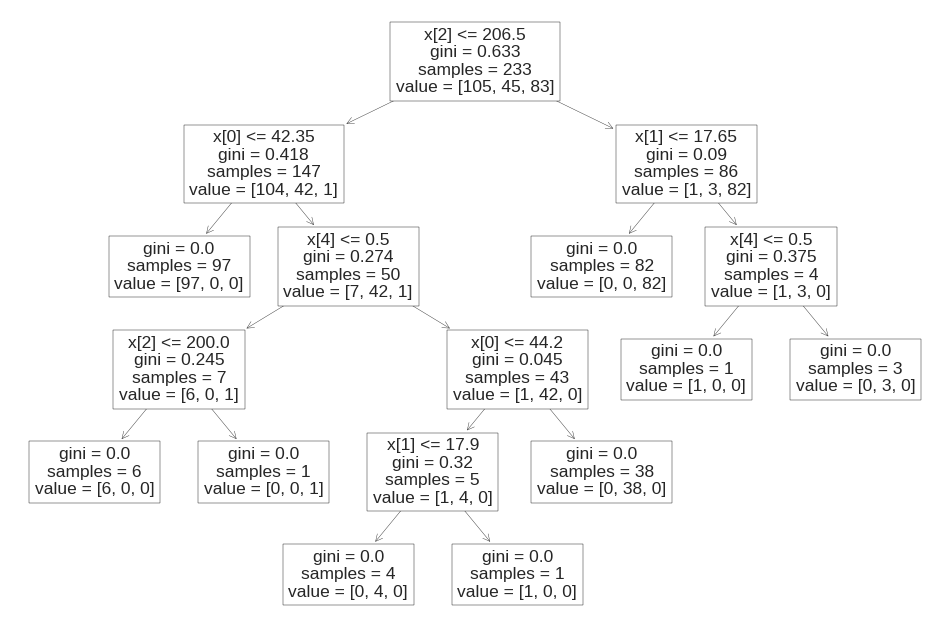

In [56]:
## Visualize the Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(DT_model);
plt.show();

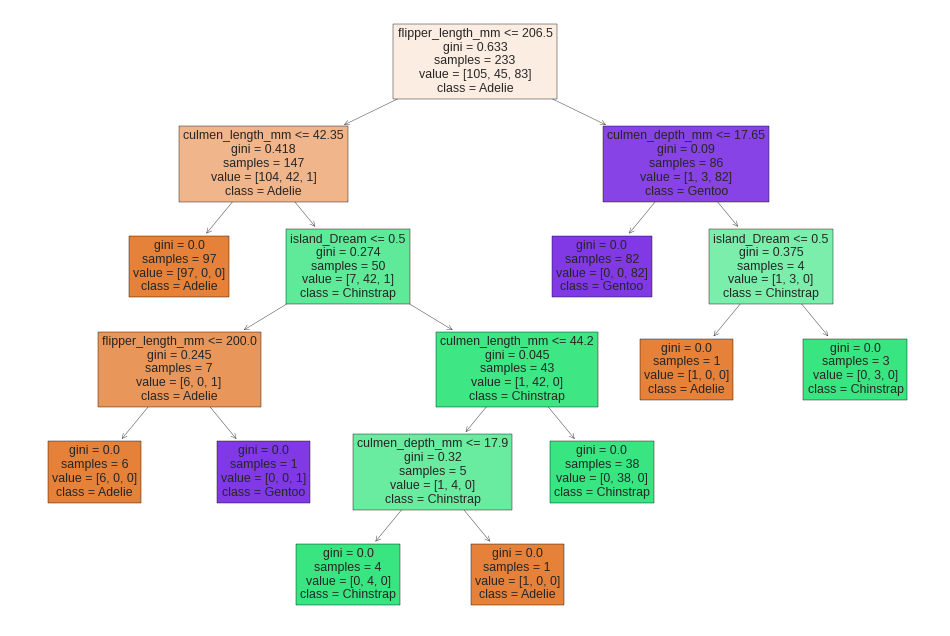

In [57]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
plt.show();

# Understanding HYper PArameters

In [58]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [59]:
## MAX_depth -> hyperparameter to generalise the resultsfrom both data

In [60]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  1 82]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.83      1.00      0.91        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.96       233
   macro avg       0.94      0.97      0.95       233
weighted avg       0.97      0.96      0.96       233



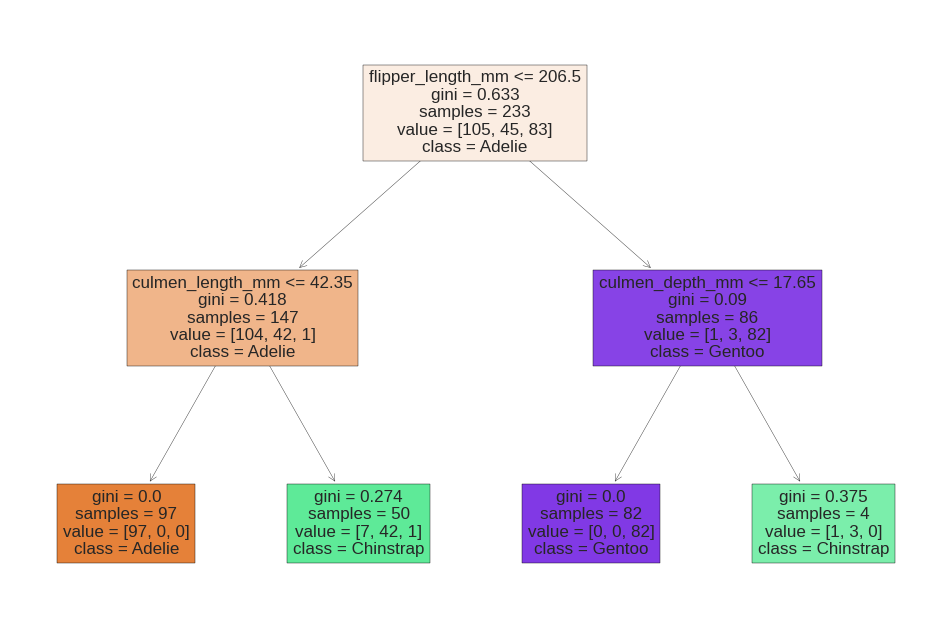

In [61]:
report_model(pruned_tree,)

## Max_leaf_node hyperparameter max_leaf node not more than 10

In [62]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=101,)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=101)



Test Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



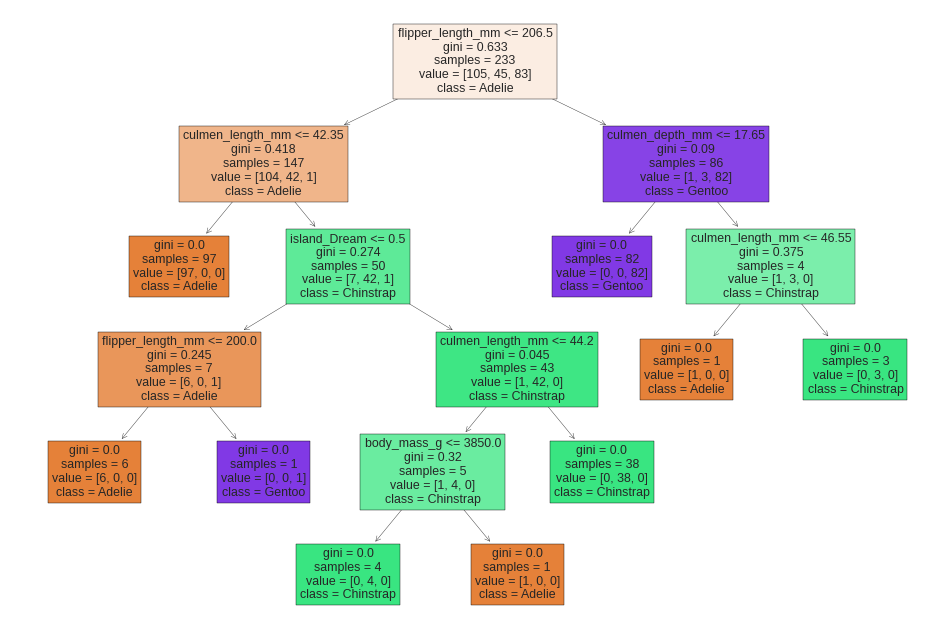

In [63]:
report_model(pruned_tree_2)

## Criterion

In [68]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



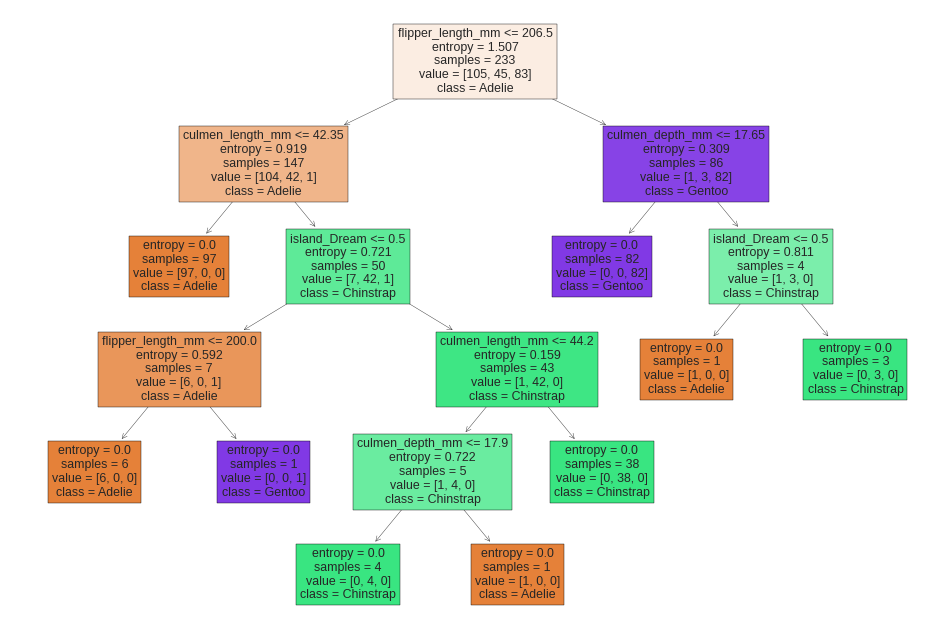

In [69]:
report_model(entropy_tree)

## max features, spliter

## Min Sample Split parameter will give min value to be a leaf Node

In [66]:
tree = DecisionTreeClassifier(min_samples_split = 15)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=15)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[103   2   0]
 [  0  45   0]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.99      0.98      0.99       105
   Chinstrap       0.96      1.00      0.98        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.98      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



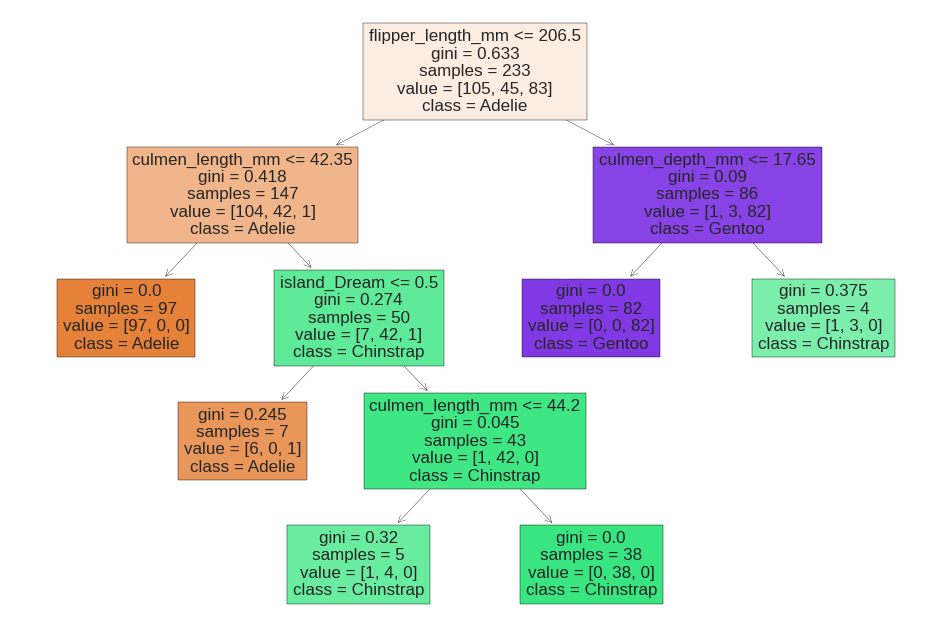

In [67]:
report_model(tree)

In [ ]:
tree = DecisionTreeClassifier(splitter = "best", max_features=2)
tree.fit(X_train,y_train)  ##it will find random 2 features and take the best one

In [ ]:
report_model(tree)

## Find Best Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier(random_state=101)

In [ ]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [ ]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train2, y_train2)

In [ ]:
grid_model.best_params_

## The End